Наши данные представляют собой четыре таблицы:

ratings1 и ratings2 — таблицы с данными о выставленных пользователями оценках фильмов. Они имеют одинаковую структуру и типы данных — на самом деле это две части одной таблицы с оценками фильмов.
Img

userId — уникальный идентификатор пользователя, который выставил оценку;
movieId — уникальный идентификатор фильма;
rating — рейтинг фильма.
dates — таблица с датами выставления всех оценок.
Img

date — дата и время выставления оценки фильму.
movies — таблица с информацией о фильмах.
Img

movieId — уникальный идентификатор фильма;
title — название фильма и год его выхода;
genres — жанры фильма.

Итак, представим, что нам надо получить единую таблицу, в которой будут собраны рейтинги, даты выставления рейтингов, а также информация о фильмах. Вот как мы будем действовать:

1
Склеим таблицы ratings1 и ratings2 в единую структуру.

2
К полученной таблице с рейтингами подсоединим столбец с датой проставления рейтинга, склеив столбцы таблиц между собой.

3
Присоединим к нашей таблице информацию о названиях и жанрах фильмов.

In [28]:
import pandas as pd
movies = pd.read_csv('D:\idi\skilfaktory\PYTHON-10. Введение в Pandas\DATA\movies.csv')


movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [29]:
print(movies['title'].nunique())

9737


In [30]:
dates=pd.read_csv('D:\idi\skilfaktory\PYTHON-10. Введение в Pandas\DATA\dates.csv')

In [31]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    100836 non-null  object
dtypes: object(1)
memory usage: 787.9+ KB


In [32]:
dates['date'] = pd.to_datetime(dates['date'], dayfirst=True)
display(dates['date'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_22576\2944436678.py:1: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dates['date'] = pd.to_datetime(dates['date'], dayfirst=True)


0        2000-07-30 18:45:03
1        2000-07-30 18:20:47
2        2000-07-30 18:37:04
3        2000-07-30 19:03:35
4        2000-07-30 18:48:51
                 ...        
100831   2017-05-03 21:53:22
100832   2017-05-03 22:21:31
100833   2017-05-08 19:50:47
100834   2017-05-03 21:19:12
100835   2017-05-03 21:20:15
Name: date, Length: 100836, dtype: datetime64[ns]

In [33]:
years_sold = dates['date'].dt.year
years_sold.mode() #чаще всего встречаемый обьект 

0    2000
Name: date, dtype: int32

**Основные параметры функции concat()** (которая позволяет склеивать (конкатенировать) таблицы как по строкам, так и по столбцам.)

objs — список объектов DataFrame ([df1, df2,…]), которые должны быть сконкатенированы;

axis — ось определяет направление конкатенации: 0 — конкатенация по строкам (по умолчанию), 1 — конкатенация по столбцам;

join — либо inner (пересечение), либо outer (объединение); рассмотрим этот момент немного позже;

ignore_index — по умолчанию установлено значение False, которое позволяет значениям индекса оставаться такими, какими они были в исходных данных. Если установлено значение True, параметр будет игнорировать исходные значения и повторно назначать значения индекса в последовательном порядке.

In [34]:
ratings1=pd.read_csv('D:/idi/skilfaktory/PYTHON-10. Введение в Pandas/DATA/ratings1.csv')
ratings2=pd.read_csv('D:/idi/skilfaktory/PYTHON-10. Введение в Pandas/DATA/ratings2.csv')

если не поставить игнор индекс то нумерация склееной таблице не будет совпадать с кол-вом строк , поэтому ставим игнор_индекс = Тру

In [35]:
ratings = pd.concat(
    [ratings1, ratings2],
    ignore_index=True
)
display(ratings)

userId  movieId  rating
0            1        1     4.0
1            1        3     4.0
2            1        6     4.0
3            1       47     5.0
4            1       50     5.0
...        ...      ...     ...
100832     610   166534     4.0
100833     610   168248     5.0
100834     610   168250     5.0
100835     610   168252     5.0
100836     610   170875     3.0

[100837 rows x 3 columns]

далее проверяем совпадают ли кол-во строк в таблице с рейтингом и датами

In [36]:
print('Число строк в таблице ratings: ', ratings.shape[0])
print('Число строк в таблице dates: ', dates.shape[0])
print(ratings.shape[0] == dates.shape[0])

# Число строк в таблице ratings: 100837
# Число строк в таблице dates: 100836
# False

Число строк в таблице ratings:  100837
Число строк в таблице dates:  100836
False


На самом деле очень просто: при выгрузке данных информация об оценках какого-то  пользователя попала в обе таблицы (ratings1 и ratings2). В результате конкатенации случилось дублирование строк. В данном примере их легко найти — выведем последнюю строку таблицы ratings1 и первую строку таблицы ratings2:

In [37]:
display(ratings1.tail(1))
display(ratings2.head(1))

userId  movieId  rating
40000     274     5621     2.0

userId  movieId  rating
0     274     5621     2.0

чтобы очистить таблицу от дублей используем метод drop_duplicates() ставим игнор_индекс = Тру

In [38]:
ratings =  ratings.drop_duplicates(ignore_index=True)
print('число строк в таблице' , ratings.shape[0])

число строк в таблице 100836


теперь можно соединить таблицы рейтингов и дат по столбцам

In [39]:
ratings_dates =  pd.concat([ratings , dates],axis=1 )
display(ratings_dates.tail(7))

userId  movieId  rating                date
100829     610   164179     5.0 2017-05-03 21:07:11
100830     610   166528     4.0 2017-05-04 06:29:25
100831     610   166534     4.0 2017-05-03 21:53:22
100832     610   168248     5.0 2017-05-03 22:21:31
100833     610   168250     5.0 2017-05-08 19:50:47
100834     610   168252     5.0 2017-05-03 21:19:12
100835     610   170875     3.0 2017-05-03 21:20:15

In [40]:
df1 = pd.DataFrame({"Name": ["Pankaj", "Lisa"], "Surname": ["Sobolev", "Krasnova"]})
df2 = pd.DataFrame({"Role": ["Admin", "Editor"]})
df = pd.concat([df1 , df2] , axis=1)
display(df)

Name   Surname    Role
0  Pankaj   Sobolev   Admin
1    Lisa  Krasnova  Editor

ТИПЫ ОБЪЕДИНЕНИЙ

Типы объединений в Pandas тесно связаны с операцией join из SQL, которую мы будем рассматривать в курсе в дальнейшем.

**два основных типа объединения таблиц:**

*inner (внутреннее)*

При использовании такого типа объединения в результирующей таблице остаются только те записи, которые есть в обеих таблицах.

Аналогия в теории множеств
Пересечение (intersection) множеств А и В.

Строки, для которых совпадение не было найдено, удаляются.



*outer (внешнее)*

Данный тип делится на три подтипа:

full — используется как outer по умолчанию, объединяет все варианты в обеих таблицах.

Аналогия в теории множеств
left — для всех записей из «левой» таблицы (например, ratings) ведётся поиск соответствий в «правой» (например, movies). В результирующей таблице останутся только те значения, которым были найдены соответствия, то есть только значения из ratings.

Аналогия в теории множеств
Вычитание (difference) множества B из результата объединения (union) множеств А и В.

right — аналогично предыдущему, но остаются значения только из «правой» таблицы. 

Аналогия в теории множеств
Вычитание (difference) множества А из результата объединения (union) множеств А и В.

Открыть примечание
Во всех трёх случаях, если совпадений между таблицами не найдено, на этом месте ставится пропуск (NaN).

**метод обьединения**

Для обьединения 2 таблиц по индексам исползуется метод dataFrame join(). однако он может быть применен и для того чтобы обьединить таблицы по ключевому признаку( в нашем случае по столбцу(movieId))

**Параментры Join**

other — таблица, которую мы присоединяем. При объединении она является «правой», а исходная таблица, от имени которой вызывается метод, является «левой».

how — параметр типа объединения. Он может принимать значения 'inner', 'left' (left outer), 'right' (right outer), и 'outer' (full outer). По умолчанию параметр установлен на 'left'.

on — параметр, который определяет, по какому столбцу в «левой» таблице происходит объединение по индексам из «правой».

lsuffix и rsuffix — дополнения (суффиксы) к названиям одноимённых столбцов в «левой» и «правой» таблицах.

Если использовать метод join() «в лоб» (без указания ключевого столбца), то объединение произойдёт, как и задумано — по индексам двух таблиц согласно установленному типу объединения.

In [41]:
joined_false = ratings_dates.join(
    movies,
    rsuffix='_right',
    how='outer'
)
display(joined_false)

userId  movieId  rating                date  movieId_right  \
0            1        1     4.0 2000-07-30 18:45:03            1.0   
1            1        3     4.0 2000-07-30 18:20:47            2.0   
2            1        6     4.0 2000-07-30 18:37:04            3.0   
3            1       47     5.0 2000-07-30 19:03:35            4.0   
4            1       50     5.0 2000-07-30 18:48:51            5.0   
...        ...      ...     ...                 ...            ...   
100831     610   166534     4.0 2017-05-03 21:53:22            NaN   
100832     610   168248     5.0 2017-05-03 22:21:31            NaN   
100833     610   168250     5.0 2017-05-08 19:50:47            NaN   
100834     610   168252     5.0 2017-05-03 21:19:12            NaN   
100835     610   170875     3.0 2017-05-03 21:20:15            NaN   

                                     title  \
0                         Toy Story (1995)   
1                           Jumanji (1995)   
2                  Grumpier Old Men (1995)   
3                 Waiting to Exhale (1995)   
4       Father of the Bride Part II (1995)   
...                                    ...   
100831                                 NaN   
100832                                 NaN   
100833                                 NaN   
100834                                 NaN   
100835                                 NaN   

                                             genres  
0       Adventure|Animation|Children|Comedy|Fantasy  
1                        Adventure|Children|Fantasy  
2                                    Comedy|Romance  
3                              Comedy|Drama|Romance  
4                                            Comedy  
...                                             ...  
100831                                          NaN  
100832                                          NaN  
100833                                          NaN  
100834                                          NaN  
100835                                          NaN  

[100836 rows x 7 columns]

Однако это не тот результат, который мы хотели, ведь мы не получили соответствия фильмов и их рейтингов. Чтобы совместить таблицы по ключевому столбцу с помощью метода join(), необходимо использовать ключевой столбец в «правой» таблице в качестве индекса. Это можно сделать с помощью метода set_index(). Также необходимо указать название ключа в параметре on.

In [42]:
joined =  ratings_dates.join(
    movies.set_index('movieId'),
    on = 'movieId', 
    how='left'
)
display(joined.head())

userId  movieId  rating                date                        title  \
0       1        1     4.0 2000-07-30 18:45:03             Toy Story (1995)   
1       1        3     4.0 2000-07-30 18:20:47      Grumpier Old Men (1995)   
2       1        6     4.0 2000-07-30 18:37:04                  Heat (1995)   
3       1       47     5.0 2000-07-30 19:03:35  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0 2000-07-30 18:48:51   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller

стоит обратить внимание что после такого обьединения остался лишь один столбец movieId

Примечание. Join() также можно использовать с параметром how='outer'.

**Метод обьединения MERGE**

метод merge() предназначен для слияния двух таблиц по ключевым столбцам или по индексам. Однако, в отличие от join(), метод merge() предлагает более гибкий способ управления объединением, благодаря чему является более популярным.

right — присоединяемая таблица. По умолчанию она является «правой».

how — параметр типа объединения. По умолчанию принимает значение 'inner'.

on — параметр, который определяет, по какому столбцу происходит объединение. Определяется автоматически, но рекомендуется указывать вручную.

left_on — если названия столбцов в «левой» и «правой» таблицах не совпадают, то данный параметр отвечает за наименования ключевого столбца исходной таблицы.

right_on — аналогично предыдущему, параметр отвечает за наименование ключевого столбца присоединяемой таблицы.

 Метод merge() в первую очередь предназначен для слияния таблиц по заданным ключам, поэтому он не требует установки ключевых столбцов в качестве индекса присоединяемой таблицы. Кроме того, данный метод позволяет объединять даже таблицы с разноимёнными ключами. Таким образом, merge() проще в использовании и более многофункционален, чем схожие методы.

In [43]:
merged= ratings_dates.merge(
    movies,
    on ='movieId',
    how ='left'
)
display(merged.head())

userId  movieId  rating                date                        title  \
0       1        1     4.0 2000-07-30 18:45:03             Toy Story (1995)   
1       1        3     4.0 2000-07-30 18:20:47      Grumpier Old Men (1995)   
2       1        6     4.0 2000-07-30 18:37:04                  Heat (1995)   
3       1       47     5.0 2000-07-30 19:03:35  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0 2000-07-30 18:48:51   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller

In [44]:
print('Число строк в таблице ratings_dates: ', ratings_dates.shape[0])
print('Число строк в таблице merged: ', merged.shape[0])
print(ratings_dates.shape[0] == merged.shape[0])

# Число строк в таблице ratings_dates: 100836
# Число строк в таблице merged: 100836

Число строк в таблице ratings_dates:  100836
Число строк в таблице merged:  100836
True


Возникает вопрос: почему мы выбрали тип объединения left, а не full, например?

Найти ответ нам поможет пример. Объединим ratings_dates с movies по ключевому столбцу movieId, но с параметром how='outer' (full outer) и выведем размер таблицы, а также её «хвост»:

In [45]:
merged2=  ratings_dates.merge(
    movies,
    on = 'movieId',
    how='outer'
)
print('Число строк в таблице merget2:',merged2.shape[0])
display(merged2.tail())

Число строк в таблице merget2: 100854


userId  movieId  rating                date  \
100849   184.0   193581     4.0 2018-09-16 14:44:42   
100850   184.0   193583     3.5 2018-09-16 14:52:25   
100851   184.0   193585     3.5 2018-09-16 14:56:45   
100852   184.0   193587     3.5 2018-09-16 15:00:21   
100853   331.0   193609     4.0 2018-09-17 04:13:26   

                                            title  \
100849  Black Butler: Book of the Atlantic (2017)   
100850               No Game No Life: Zero (2017)   
100851                               Flint (2017)   
100852        Bungo Stray Dogs: Dead Apple (2018)   
100853        Andrew Dice Clay: Dice Rules (1991)   

                                 genres  
100849  Action|Animation|Comedy|Fantasy  
100850         Animation|Comedy|Fantasy  
100851                            Drama  
100852                 Action|Animation  
100853                           Comedy

Результирующее число строк в таблице увеличилось. Но за счёт чего?

Оказывается, в таблице movies содержались фильмы, которым ещё не были выставлены оценки. В результате объединения типом full outer информация о фильмах перенеслась из таблицы movies в результирующую таблицу. Однако, поскольку оценки фильмам ещё не были выставлены, соответствующие столбцы таблицы ratings_dates заполнились пропусками (NaN). Такие фильмы были записаны в конец таблицы.

*Метод merge() с внешним (outer) типом объединения может использоваться как аналог метода concat() при объединении таблиц с одинаковой структурой (одинаковые количество и названия столбцов) по строкам. В таком случае все одноимённые столбцы таблиц будут считаться ключевыми.*

In [46]:
merge_ratings= ratings1.merge(ratings2, how='outer')
print('Число строк в таблице merge_ratings:', merge_ratings.shape[0])
display(merge_ratings)

Число строк в таблице merge_ratings: 100836


userId  movieId  rating
0            1        1     4.0
1            1        3     4.0
2            1        6     4.0
3            1       47     5.0
4            1       50     5.0
...        ...      ...     ...
100831     610   166534     4.0
100832     610   168248     5.0
100833     610   168250     5.0
100834     610   168252     5.0
100835     610   170875     3.0

[100836 rows x 3 columns]

Обратите внимание, что при использовании метода merge() для склейки двух таблиц у нас автоматически пропали дубликаты, которые мы видели при использовании метода concat(). Это особенность метода merge() — автоматическое удаление дублей.

**какой же метод использовать**

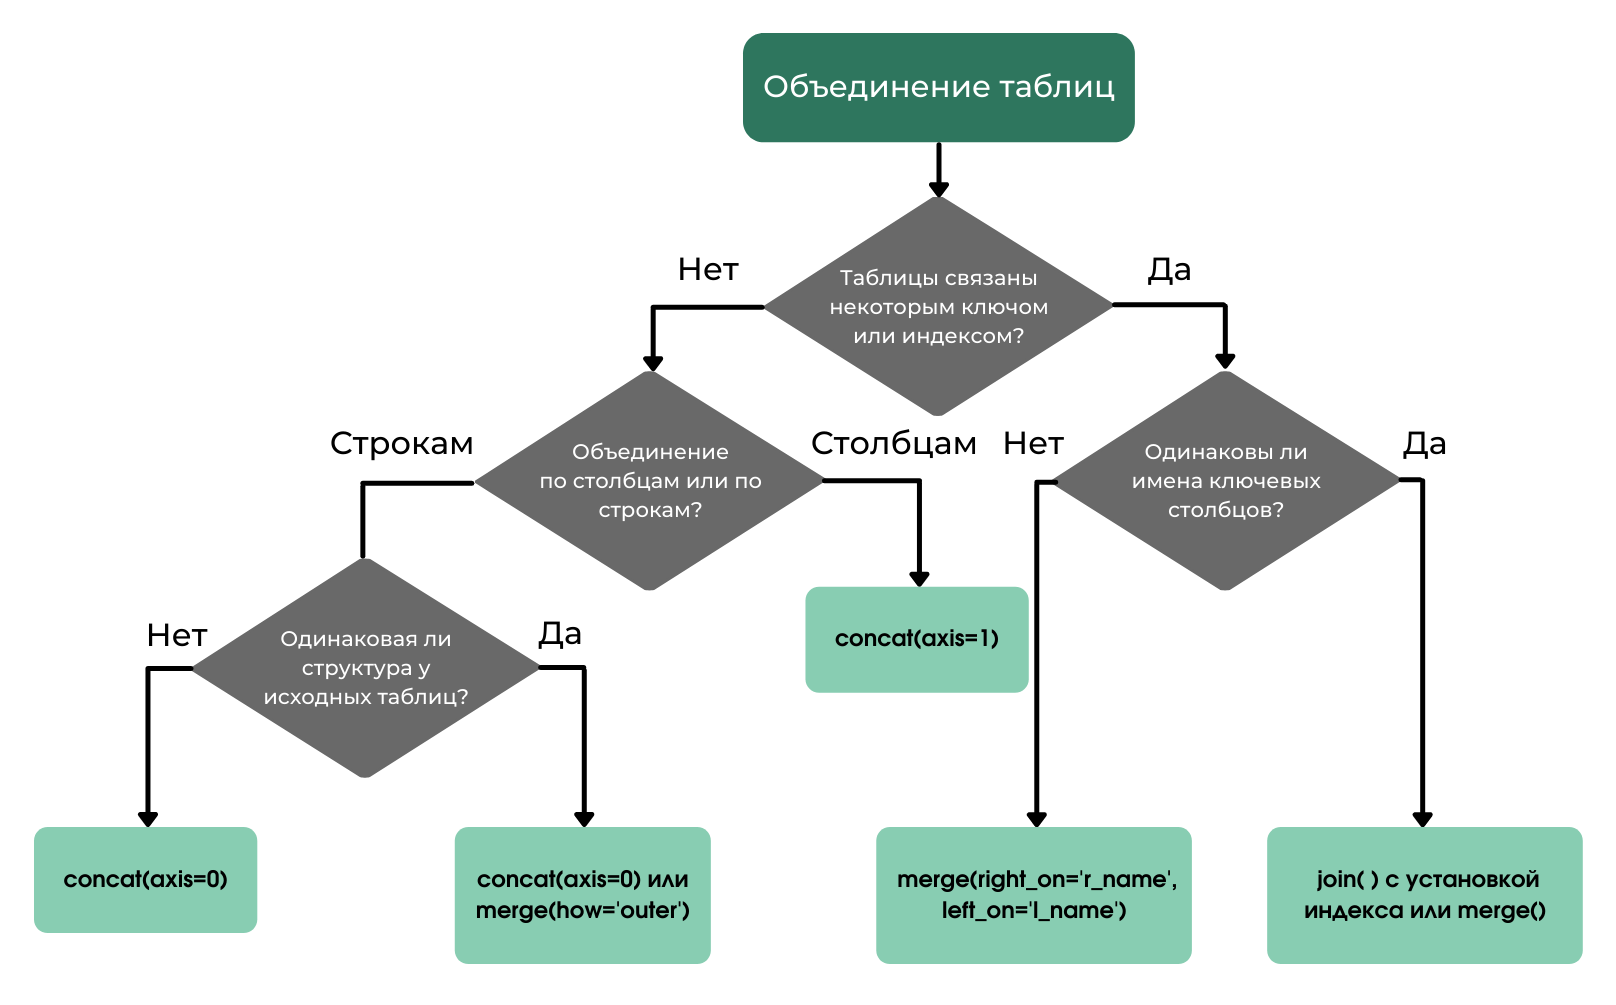

In [47]:
items_df = pd.DataFrame({
            'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 100132, 312394],
            'vendor': ['Samsung', 'LG', 'Apple', 'Apple', 'LG', 'Apple', 'Samsung', 'Samsung', 'LG', 'ZTE'],
            'stock_count': [54, 33, 122, 18, 102, 43, 77, 143, 60, 19]
        })

purchase_df = pd.DataFrame({
            'purchase_id': [101, 101, 101, 112, 121, 145, 145, 145, 145, 221],
            'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 103845, 100132],
            'price': [13900, 5330, 38200, 49990, 9890, 33000, 67500, 34500, 89900, 11400]
        })


# Введите свое решение ниже
merged = items_df.merge(purchase_df ,on= 'item_id', how='inner') 
# производим обьединение таблиц по колонке item_id
# считаем возможную выручку по кол-ву и цене далее складываем суммы 
income = (merged['price']* merged['stock_count']).sum()

print(merged.head(12))
print(income)

   item_id   vendor  stock_count  purchase_id  price
0   417283  Samsung           54          101  13900
1   849734       LG           33          101   5330
2   132223    Apple          122          101  38200
3   573943    Apple           18          112  49990
4    19475       LG          102          121   9890
5  3294095    Apple           43          145  33000
6   382043  Samsung           77          145  67500
7   302948  Samsung          143          145  34500
8   100132       LG           60          221  11400
19729490
